# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [3]:
df.dtypes

Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object

São todos dados int

In [4]:
df.isnull().sum()

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64

Como visto acima não há valores nulos dentro do banco de dados utilizado.

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [5]:
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


**Pelo analisado no describe pelo desvio padrão os outiliers estão nas colunas: Valor_Aluguel, Valor_Condominio e Metragem, .**

**Como os outliers são bastantes dentro das três colunas vou optar pela exclusão para que não tenham desvios elevados, .**

In [6]:
df_novo = df.copy()

colunas = ['Metragem', 'Valor_Aluguel', 'Valor_Condominio']

limites = {}

for coluna in colunas:
    Q1 = df_novo[coluna].quantile(0.25)
    Q3 = df_novo[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    limites[coluna] = (limite_inferior, limite_superior)

df_sem_outliers = df_novo.copy()
for coluna in colunas:
    limite_inferior, limite_superior = limites[coluna]
    df_sem_outliers = df_sem_outliers[
        (df_sem_outliers[coluna] >= limite_inferior) & (df_sem_outliers[coluna] <= limite_superior)
    ]

for coluna in colunas:
    limite_inferior, limite_superior = limites[coluna]
    num_outliers = df_novo[
        (df_novo[coluna] < limite_inferior) | (df_novo[coluna] > limite_superior)
    ].shape[0]
    print(f"Número de outliers removidos em '{coluna}': {num_outliers}")



Número de outliers removidos em 'Metragem': 647
Número de outliers removidos em 'Valor_Aluguel': 749
Número de outliers removidos em 'Valor_Condominio': 586


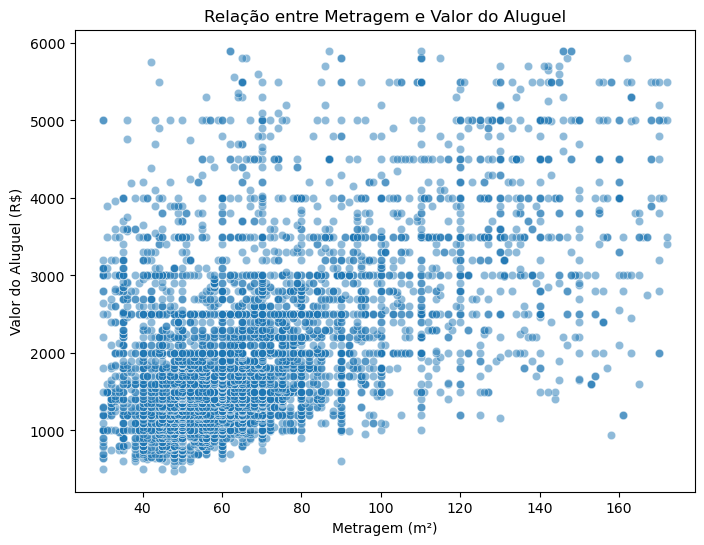

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_sem_outliers['Metragem'], y=df_sem_outliers['Valor_Aluguel'], alpha=0.5)

plt.xlabel('Metragem (m²)')
plt.ylabel('Valor do Aluguel (R$)')
plt.title('Relação entre Metragem e Valor do Aluguel')
plt.show()

Observado uma tendência de aumento no aluguel conforme a metragem aumenta.

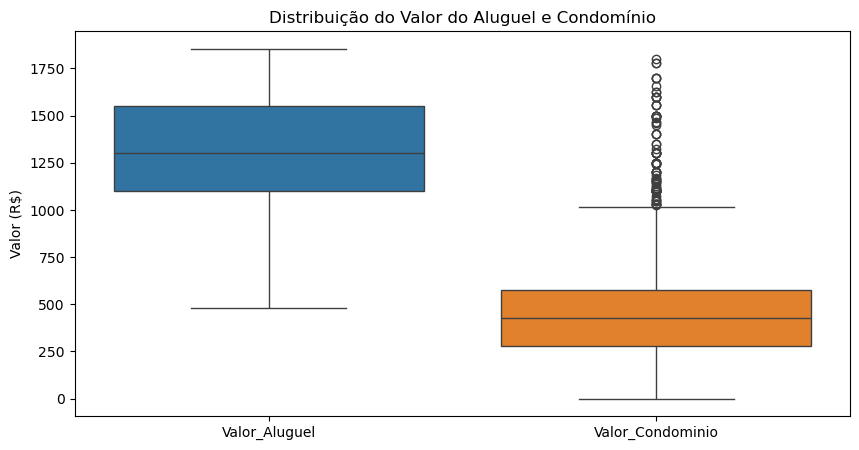

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_sem_outliers[["Valor_Aluguel", "Valor_Condominio"]])
plt.title("Distribuição do Valor do Aluguel e Condomínio")
plt.ylabel("Valor (R$)")
plt.show()


Tem muita variação dentro de uma mesma faixa, significa que a metragem sozinha não explica o valor do aluguel.

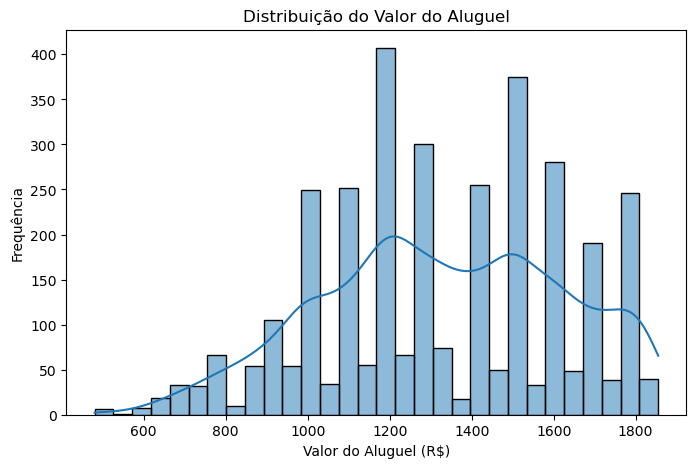

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df_sem_outliers["Valor_Aluguel"], kde=True, bins=30)
plt.title("Distribuição do Valor do Aluguel")
plt.xlabel("Valor do Aluguel (R$)")
plt.ylabel("Frequência")
plt.show()


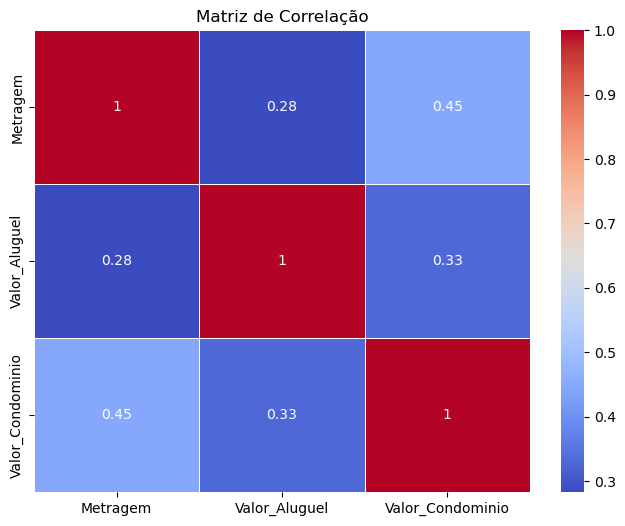

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_sem_outliers[['Metragem', 'Valor_Aluguel', 'Valor_Condominio']].corr(), 
            annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Matriz de Correlação')
plt.show()

Os três colunas não possuem forte correlação entre elas vistos valores abaxo de 0.7.

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




In [13]:
df_novo.select_dtypes(include=['number']).corr()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
Valor_Aluguel,1.000000,0.695302,0.730591,0.413139,0.603715,0.614397,0.652858
Valor_Condominio,0.695302,1.000000,0.805926,0.497420,0.585795,0.589244,0.690993
Metragem,0.730591,0.805926,1.000000,0.678091,0.687558,0.696281,0.743872
N_Quartos,0.413139,0.497420,0.678091,1.000000,0.553807,0.540887,0.591224
N_banheiros,0.603715,0.585795,0.687558,0.553807,1.000000,0.920149,0.694983
N_Suites,0.614397,0.589244,0.696281,0.540887,0.920149,1.000000,0.712054
N_Vagas,0.652858,0.690993,0.743872,0.591224,0.694983,0.712054,1.000000


**Variaveis que parecem ter correlação mais forte:**
Valor_Aluguel com Metragem
Valor_Condominio com Metragem
Metragem com N_vagas


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [14]:
X = df.drop('Valor_Aluguel', axis=1)  # Todas as variáveis, exceto o valor do aluguel
y = df['Valor_Aluguel']  # Apenas a variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamanho do conjunto de treino: {X_train.shape[0]} registros')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]} registros')


Tamanho do conjunto de treino: 5762 registros
Tamanho do conjunto de teste: 1441 registros


Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [16]:
X_train_metragem = X_train[['Metragem']]
X_test_metragem = X_test[['Metragem']]

modelo = LinearRegression()
modelo.fit(X_train_metragem, y_train)

y_pred = modelo.predict(X_test_metragem)

print(f'Coeficiente de Metragem: {modelo.coef_[0]}')


Coeficiente de Metragem: 34.4739708932487


B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

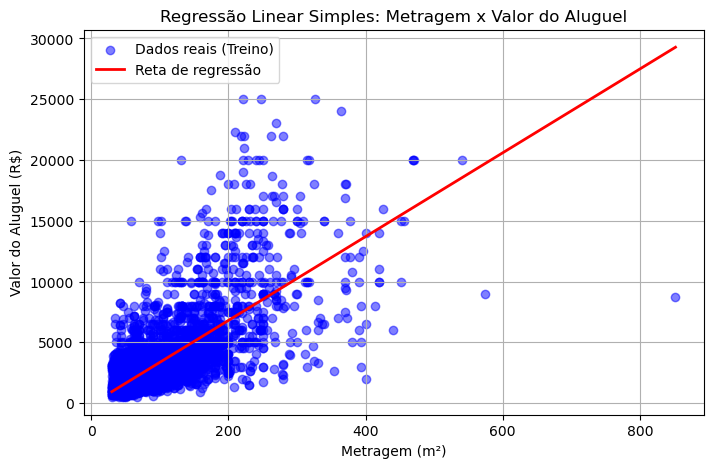

In [19]:
import numpy as np

intercepto = modelo.intercept_
coeficiente = modelo.coef_[0]

x_values = np.linspace(X_train_metragem.min(), X_train_metragem.max(), 100)
y_values = intercepto + coeficiente * x_values

plt.figure(figsize=(8, 5))
plt.scatter(X_train_metragem, y_train, color='blue', alpha=0.5, label='Dados reais (Treino)')
plt.plot(x_values, y_values, color='red', linewidth=2, label='Reta de regressão')
plt.xlabel('Metragem (m²)')
plt.ylabel('Valor do Aluguel (R$)')
plt.title('Regressão Linear Simples: Metragem x Valor do Aluguel')
plt.legend()
plt.grid()
plt.show()

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [23]:
from sklearn.metrics import r2_score

y_train_pred = modelo.predict(X_train_metragem)

r2_train = r2_score(y_train, y_train_pred)

print(f'R² do modelo na base de trein {r2_train:.4f}')


R² do modelo na base de trein 0.5214


D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

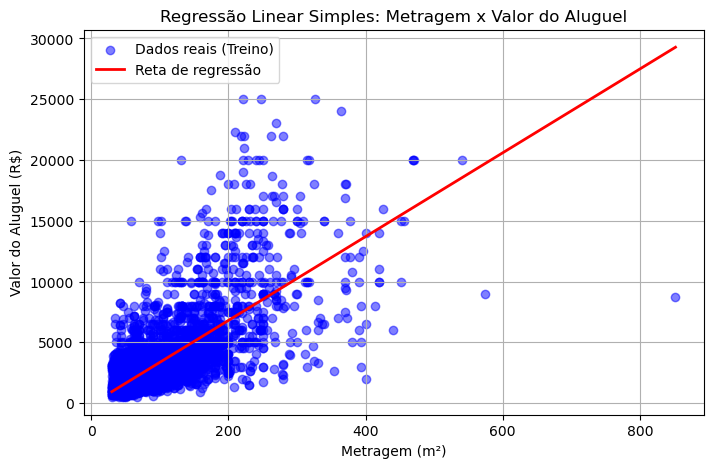

In [26]:
intercepto = modelo.intercept_
coeficiente = modelo.coef_[0]

x_values = np.linspace(X_train_metragem.min(), X_train_metragem.max(), 100)  
y_values = intercepto + coeficiente * x_values  

plt.figure(figsize=(8, 5))
plt.scatter(X_train_metragem, y_train, color='blue', alpha=0.5, label='Dados reais (Treino)')
plt.plot(x_values, y_values, color='red', linewidth=2, label='Reta de regressão')
plt.xlabel('Metragem (m²)')
plt.ylabel('Valor do Aluguel (R$)')
plt.title('Regressão Linear Simples: Metragem x Valor do Aluguel')
plt.legend()
plt.grid()
plt.show()

Possuem bastantes valores proximos da reta mas também espalhados, o que significa que outras variaveis alem da metragem também influenciam no preço,

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [27]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [29]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = modelo.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = modelo.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5697993791211697


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Escreva sua resposta aqui.

O modelo apresenta um desempenho moderado. O valor do coeficiente de determinação nos dados de teste foi 0.5698 (aproximadamente 57%), significa que cerca de 57% da variação no valor do aluguel pode ser explicada pela metragem do imóvel no conjunto de teste.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [30]:
X = df.drop(columns=['Valor_Aluguel'])
y = df['Valor_Aluguel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho da base de treino: {X_train.shape[0]} linhas")
print(f"Tamanho da base de teste: {X_test.shape[0]} linhas")


Tamanho da base de treino: 5762 linhas
Tamanho da base de teste: 1441 linhas


B) Faça o modelo de regressão linear multipla aplicado só a base de treino.


In [32]:
X = df.drop(columns=['Valor_Aluguel'])
y = df['Valor_Aluguel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("Intercepto:", modelo.intercept_)
print("Coeficientes:", modelo.coef_)


Intercepto: 435.2927315606644
Coeficientes: [   0.78400678   20.68135689 -649.12188657  223.71153486  340.33788484
  501.24631769]


C) Traga o valor do R quadrado e avalie o valor encontrado.

In [33]:
from sklearn.metrics import r2_score

y_train_pred = modelo.predict(X_train)

r2_treino = r2_score(y_train, y_train_pred)
print(f"R² na base de treino: {r2_treino:.4f}")

y_test_pred = modelo.predict(X_test)

r2_teste = r2_score(y_test, y_test_pred)
print(f"R² na base de teste: {r2_teste:.4f}")


R² na base de treino: 0.5958
R² na base de teste: 0.6401


Os valores de R² na base de treino e na base de teste são relativamente próximos. Isso indica que o modelo está generalizando bem.

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [34]:
y_test_pred = modelo.predict(X_test)

from sklearn.metrics import r2_score
r2_teste = r2_score(y_test, y_test_pred)

print(f"Coeficiente de Determinação (R²) na base de teste: {r2_teste:.4f}")


Coeficiente de Determinação (R²) na base de teste: 0.6401


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

A diferença nos R² mostra que o "Valor do Aluguel" é determinado por diversos fatores além da metragem.